___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Supervised Learning Capstone Project - Tree Methods Focus 



## Make sure to review the introduction video to understand the 3 ways of approaching this project exercise!

----

**Ways to approach the project:**
   1. Open a new notebook, read in the data, and then analyze and visualize whatever you want, then create a predictive model.
   2. Use this notebook as a general guide, completing the tasks in bold shown below.
   3. Skip to the solutions notebook and video, and treat project at a more relaxing code along walkthrough lecture series.

------
------

## GOAL: Create a model to predict whether or not a customer will Churn .

----
----


## Complete the Tasks in Bold Below!

## Part 0: Imports and Read in the Data

**TASK: Run the filled out cells below to import libraries and read in your data. The data file is "Telco-Customer-Churn.csv"**

In [126]:
# RUN THESE CELLS TO START THE PROJECT!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
df = pd.read_csv('/Users/simratkochar/Documents/Projects/SupervisedLearningCapstone/Telco-Customer-Churn.csv')

In [128]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

## Part 1: Quick Data Check

**TASK: Confirm quickly with .info() methods the datatypes and non-null values in your dataframe.**

In [129]:
# CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


**TASK: Get a quick statistical summary of the numeric columns with .describe() , you should notice that many columns are categorical, meaning you will eventually need to convert them to dummy variables.**

In [130]:
# CODE HERE
df.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

# Part 2:  Exploratory Data Analysis

## General Feature Exploration

**TASK: Confirm that there are no NaN cells by displaying NaN values per feature column.**

In [131]:
# CODE HERE
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**TASK:Display the balance of the class labels (Churn) with a Count Plot.**

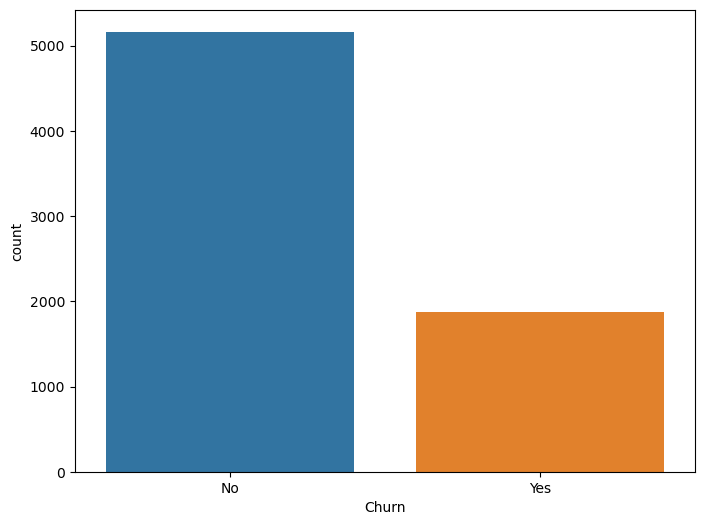

In [132]:
# CODE HERE
plt.figure(figsize=(8, 6))
sns.countplot(data = df, x = "Churn", hue = "Churn")
plt.show()

**TASK: Explore the distrbution of TotalCharges between Churn categories with a Box Plot or Violin Plot.**

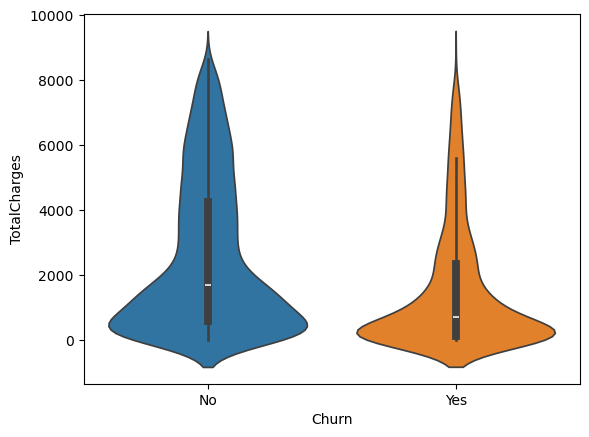

In [133]:
# CODE HERE
sns.violinplot(data = df, x = "Churn", y = "TotalCharges", hue = "Churn")
plt.show()

**TASK: Create a boxplot showing the distribution of TotalCharges per Contract type, also add in a hue coloring based on the Churn class.**

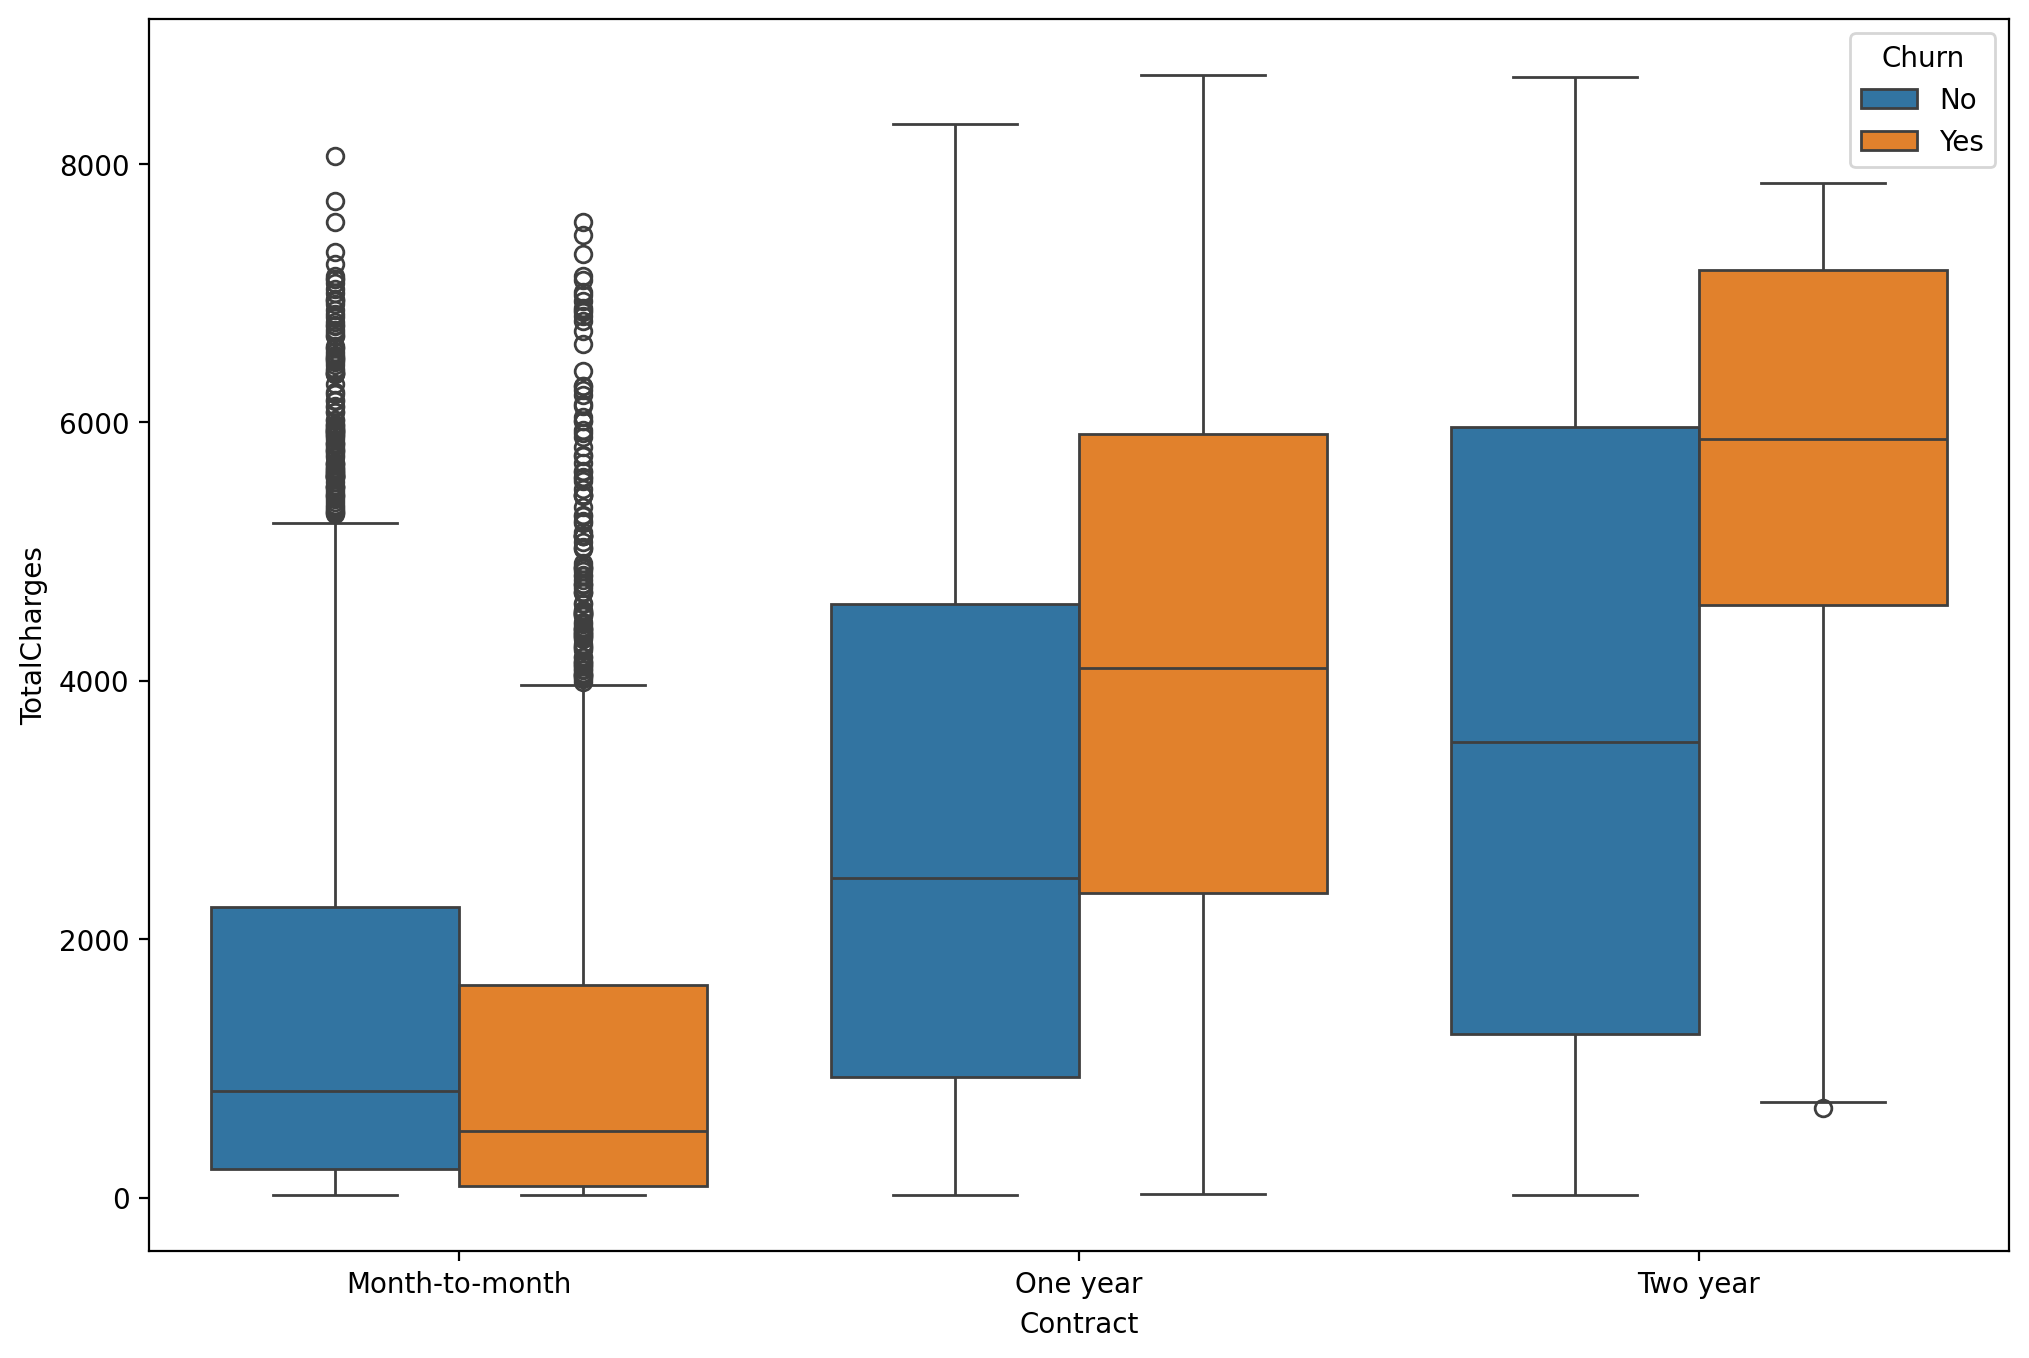

In [134]:
#CODE HERE
plt.figure(figsize=(12, 8), dpi = 200)
sns.boxplot(data = df, x = "Contract", y = "TotalCharges", hue = "Churn")
plt.show()

**TASK: Create a bar plot showing the correlation of the following features to the class label. Keep in mind, for the categorical features, you will need to convert them into dummy variables first, as you can only calculate correlation for numeric features.**

    ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

***Note, we specifically listed only the features above, you should not check the correlation for every feature, as some features have too many unique instances for such an analysis, such as customerID***

In [135]:
#CODE HERE
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [136]:
df_dummy = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']])
df_dummy.head()

SeniorCitizen  gender_Female  gender_Male  Partner_No  Partner_Yes  \
0              0           True        False       False         True   
1              0          False         True        True        False   
2              0          False         True        True        False   
3              0          False         True        True        False   
4              0           True        False        True        False   

   Dependents_No  Dependents_Yes  PhoneService_No  PhoneService_Yes  \
0           True           False             True             False   
1           True           False            False              True   
2           True           False            False              True   
3           True           False             True             False   
4           True           False            False              True   

   MultipleLines_No  ...  Contract_One year  Contract_Two year  \
0             False  ...              False              False   
1              True  ...               True              False   
2              True  ...              False              False   
3             False  ...               True              False   
4              True  ...              False              False   

   PaperlessBilling_No  PaperlessBilling_Yes  \
0                False                  True   
1                 True                 False   
2                False                  True   
3                 True                 False   
4                False                  True   

   PaymentMethod_Bank transfer (automatic)  \
0                                    False   
1                                    False   
2                                    False   
3                                     True   
4                                    False   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                  False                            True   
1                                  False                           False   
2                                  False                           False   
3                                  False                           False   
4                                  False                            True   

   PaymentMethod_Mailed check  Churn_No  Churn_Yes  
0                       False      True      False  
1                        True      True      False  
2                        True     False       True  
3                       False      True      False  
4                       False     False       True  

[5 rows x 44 columns]

In [137]:
df_corr = df_dummy.corr()

corr_churn = df_corr["Churn_Yes"].sort_values().iloc[1:-1]
corr_churn

Contract_Two year                         -0.301552
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

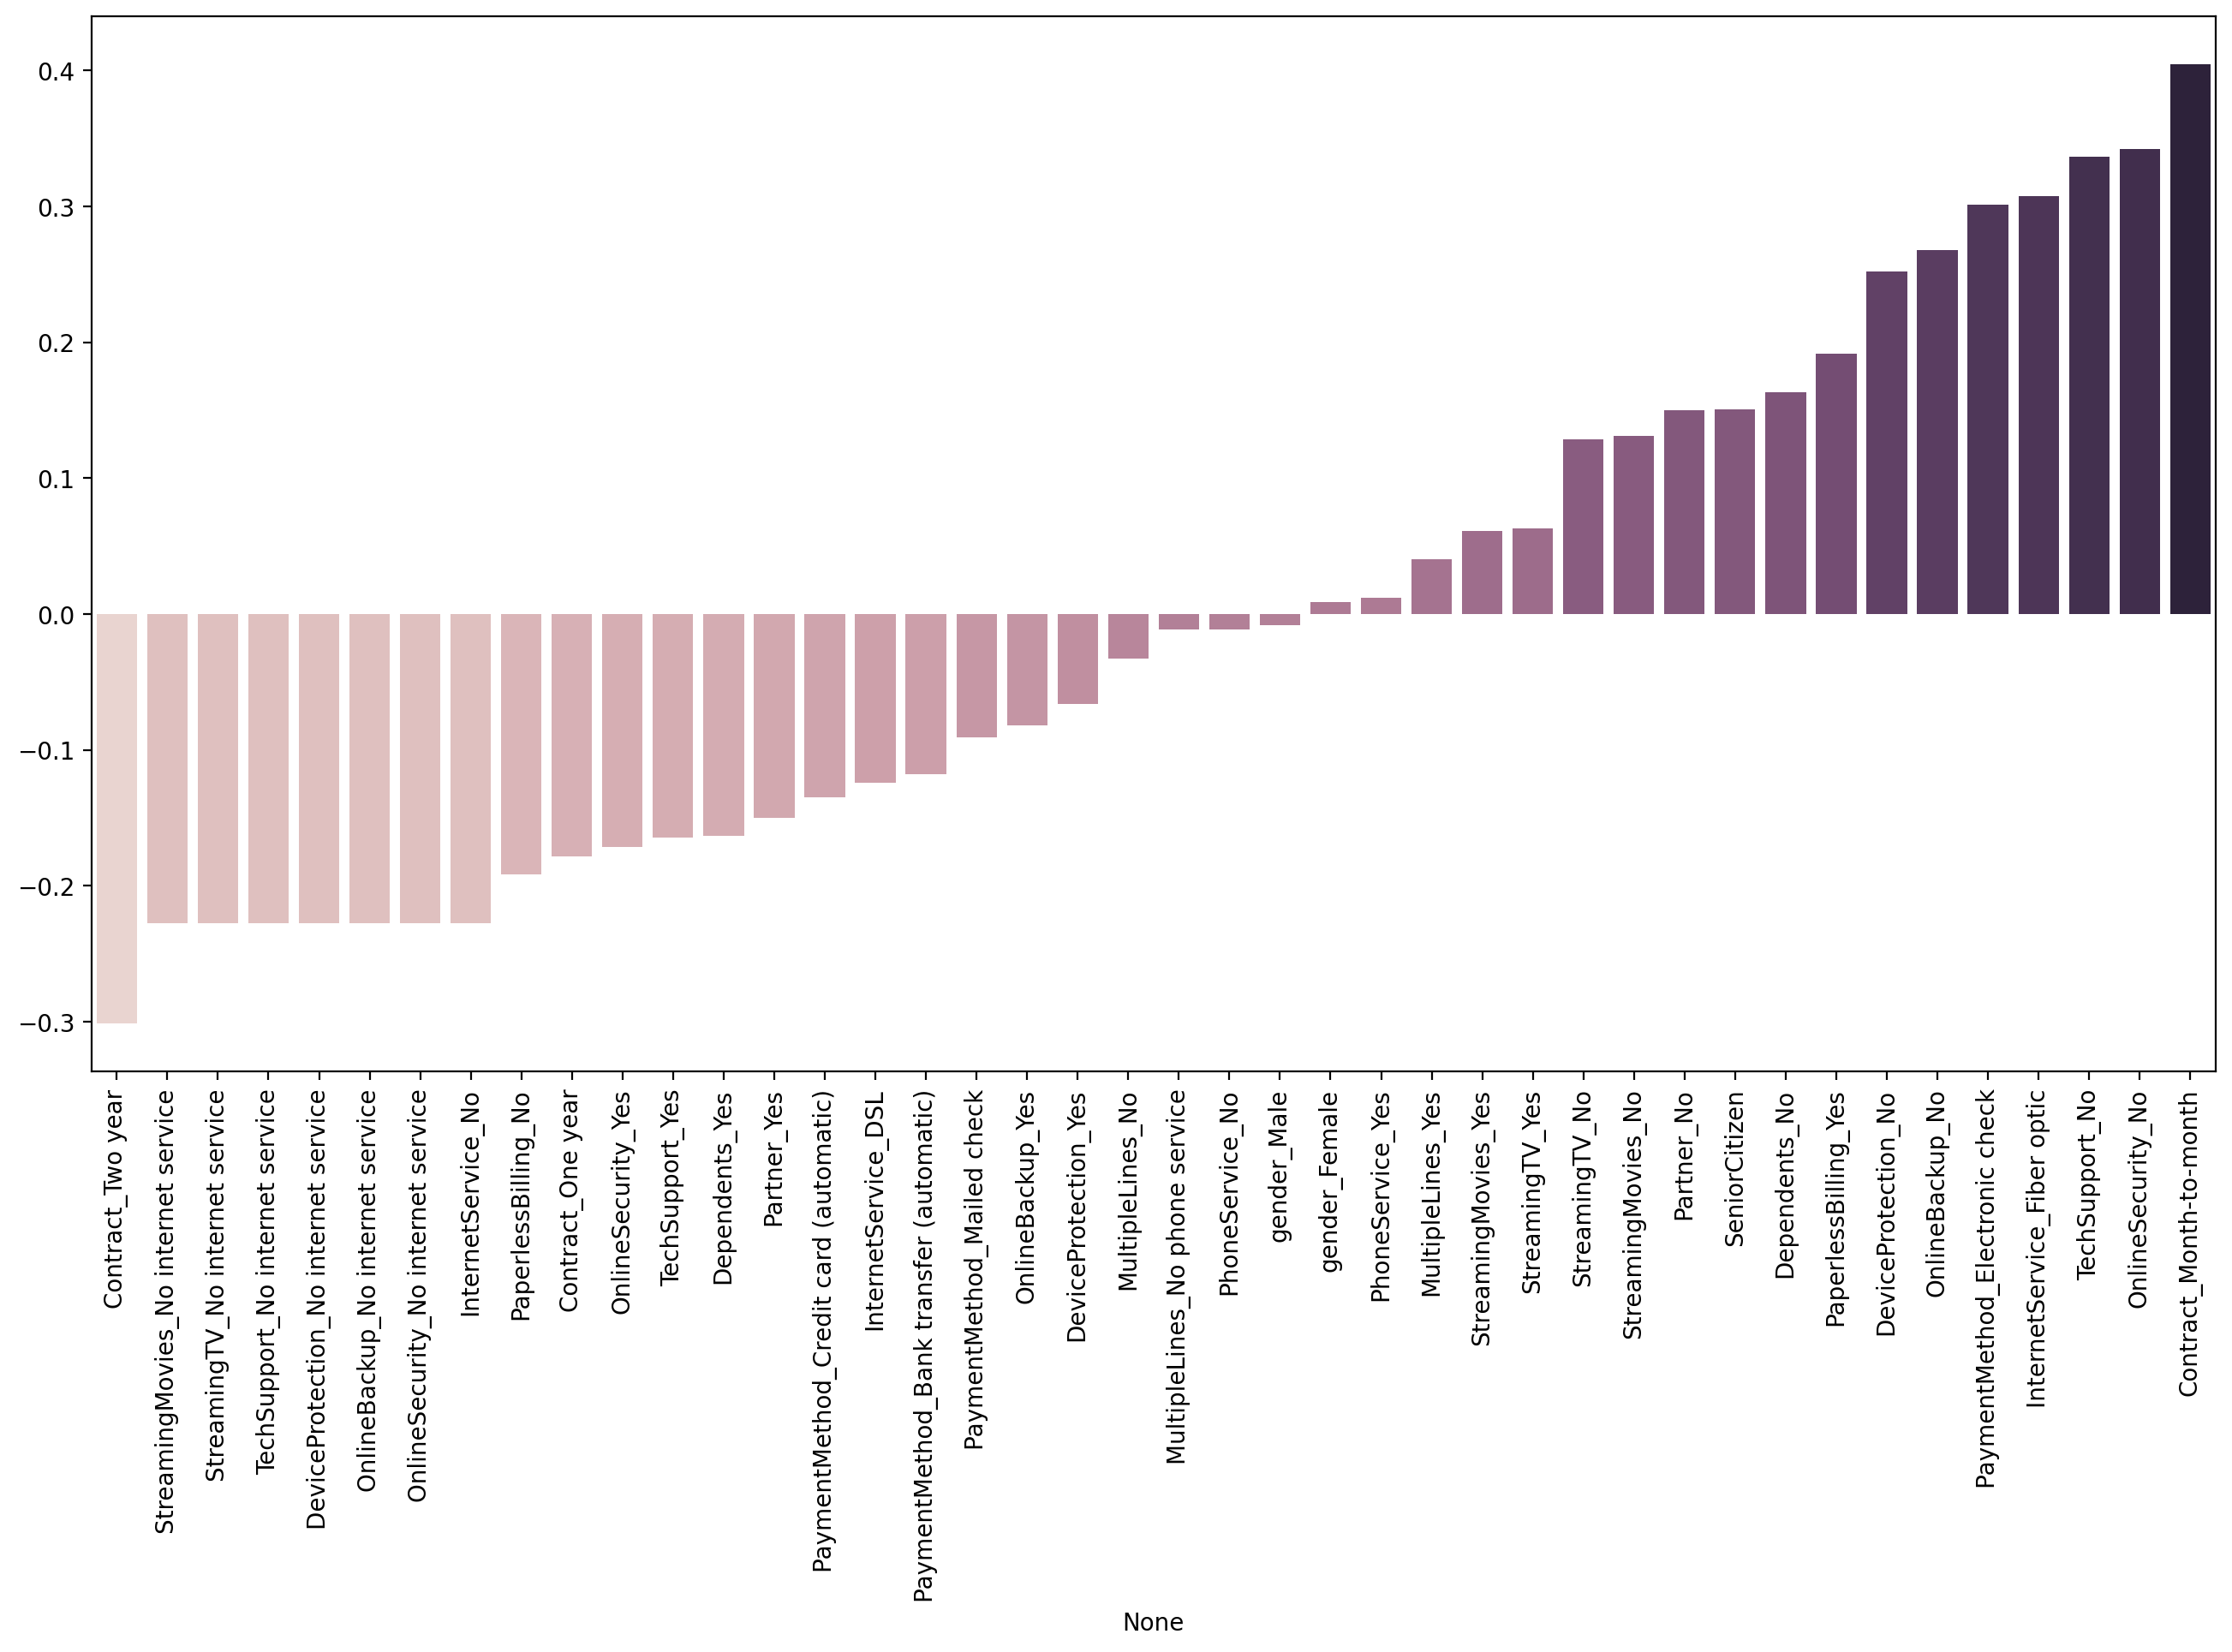

In [138]:
plt.figure(figsize=(16, 8), dpi = 200)
sns.barplot(x = corr_churn.index, y = corr_churn.values, hue = corr_churn, legend = False)
plt.xticks(rotation = 90)
plt.show()


---
---

# Part 3: Churn Analysis

**This section focuses on segementing customers based on their tenure, creating "cohorts", allowing us to examine differences between customer cohort segments.**

**TASK: What are the 3 contract types available?**

In [139]:
# CODE HERE
print(df["Contract"].unique())

['Month-to-month' 'One year' 'Two year']


**TASK: Create a histogram displaying the distribution of 'tenure' column, which is the amount of months a customer was or has been on a customer.**

<Axes: xlabel='tenure', ylabel='Count'>

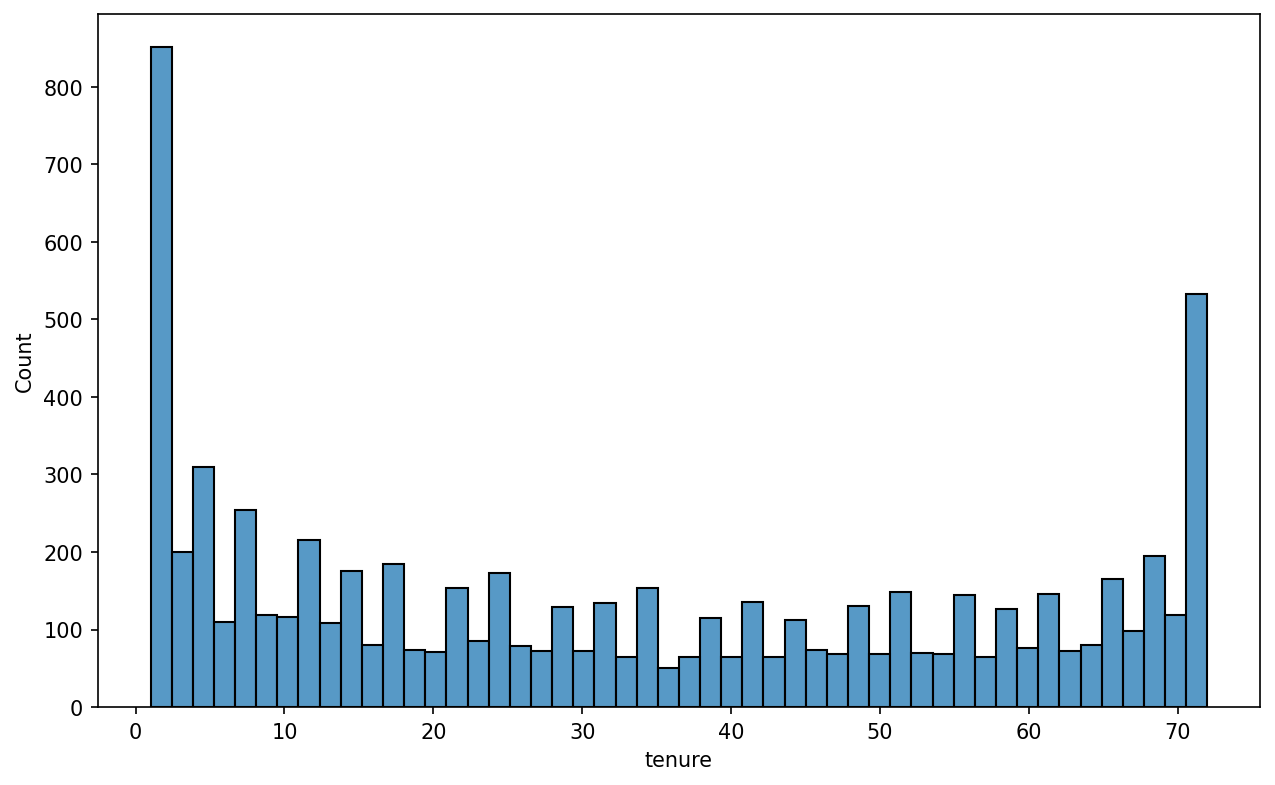

In [140]:
#CODE HERE
plt.figure(figsize=(10, 6), dpi = 150)
sns.histplot(data = df, x = "tenure", bins = 50)

**TASK: Now use the seaborn documentation as a guide to create histograms separated by two additional features, Churn and Contract.**

<Figure size 2000x600 with 0 Axes>

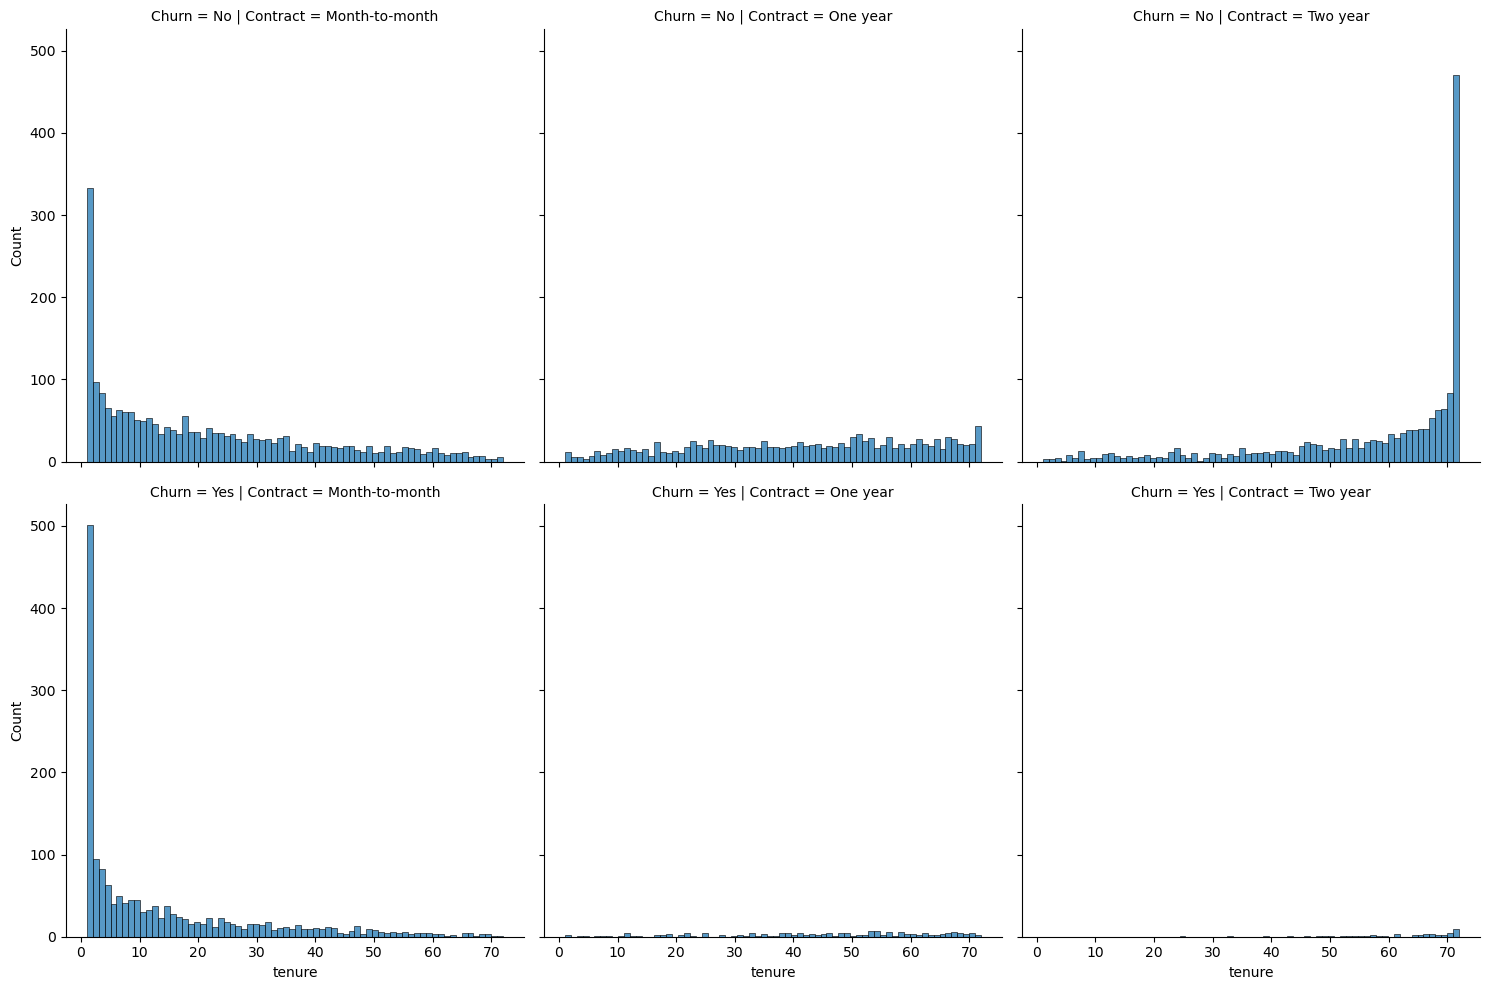

In [141]:
#CODE HERE
plt.figure(figsize=(10,3),dpi=200)
sns.displot(data=df,x='tenure',bins=70,col='Contract',row='Churn');
plt.show()

**TASK: Display a scatter plot of Total Charges versus Monthly Charges, and color hue by Churn.**

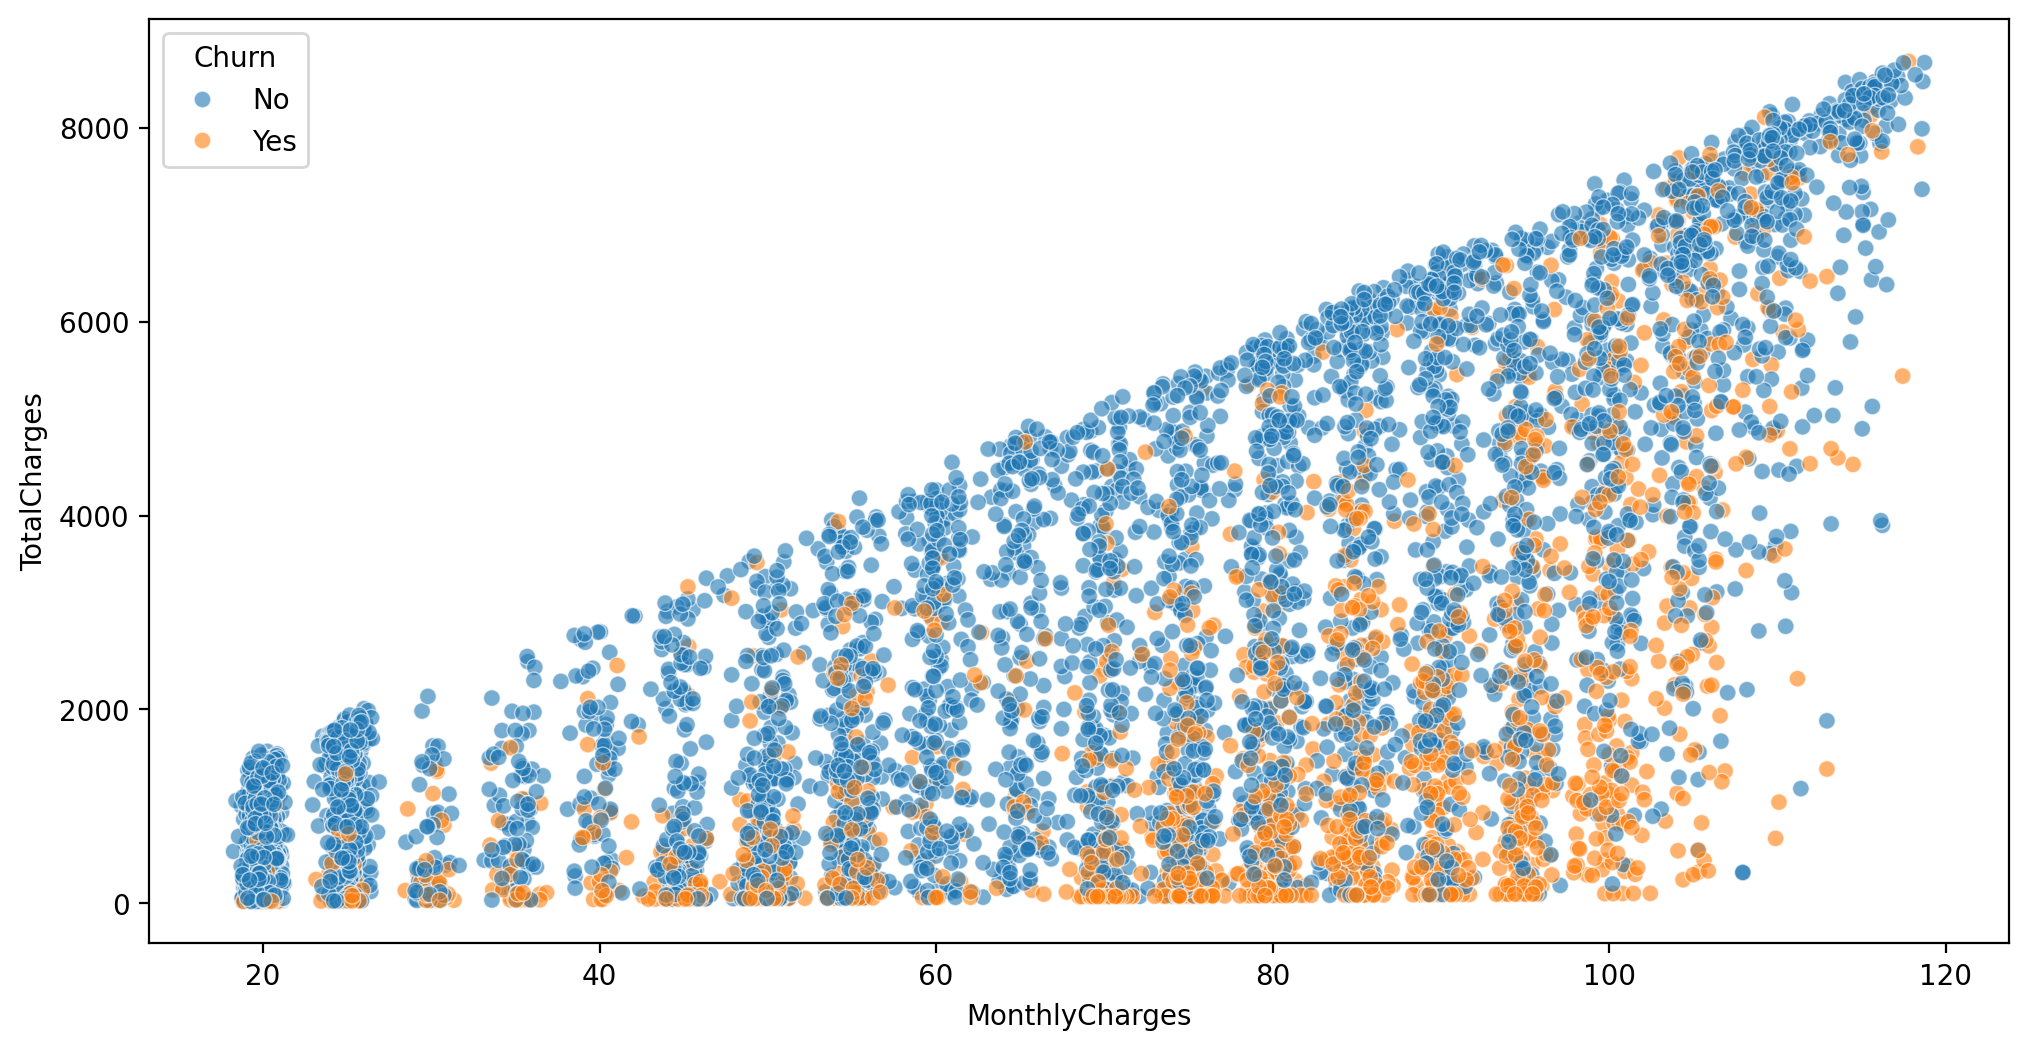

In [142]:
#CODE HERE
plt.figure(figsize=(12, 6), dpi = 200)
sns.scatterplot(data = df, x = "MonthlyCharges", y = "TotalCharges", hue = "Churn", alpha = 0.6)
plt.show()

### Creating Cohorts based on Tenure

**Let's begin by treating each unique tenure length, 1 month, 2 month, 3 month...N months as its own cohort.**

**TASK: Treating each unique tenure group as a cohort, calculate the Churn rate (percentage that had Yes Churn) per cohort. For example, the cohort that has had a tenure of 1 month should have a Churn rate of 61.99%. You should have cohorts 1-72 months with a general trend of the longer the tenure of the cohort, the less of a churn rate. This makes sense as you are less likely to stop service the longer you've had it.**

In [143]:
#CODE HERE
churn_df = df.groupby(['Churn','tenure']).count().transpose()
churn_df.head()

Churn           No                                        ... Yes            \
tenure          1    2    3   4   5   6   7   8   9   10  ...  63 64 65  66   
customerID     233  115  106  93  69  70  80  81  73  71  ...   4  4  9  13   
gender         233  115  106  93  69  70  80  81  73  71  ...   4  4  9  13   
SeniorCitizen  233  115  106  93  69  70  80  81  73  71  ...   4  4  9  13   
Partner        233  115  106  93  69  70  80  81  73  71  ...   4  4  9  13   
Dependents     233  115  106  93  69  70  80  81  73  71  ...   4  4  9  13   

Churn                              
tenure         67 68 69  70 71 72  
customerID     10  9  8  11  6  6  
gender         10  9  8  11  6  6  
SeniorCitizen  10  9  8  11  6  6  
Partner        10  9  8  11  6  6  
Dependents     10  9  8  11  6  6  

[5 rows x 144 columns]

In [144]:
churn_yes = churn_df["Yes"]
churn_no = churn_df["No"]

In [145]:
churn_rate = churn_yes/(churn_yes + churn_no) * 100
churn_rate = churn_rate.transpose()
churn_rate

customerID     gender  SeniorCitizen    Partner  Dependents  \
tenure                                                                
1        61.990212  61.990212      61.990212  61.990212   61.990212   
2        51.680672  51.680672      51.680672  51.680672   51.680672   
3        47.000000  47.000000      47.000000  47.000000   47.000000   
4        47.159091  47.159091      47.159091  47.159091   47.159091   
5        48.120301  48.120301      48.120301  48.120301   48.120301   
...            ...        ...            ...        ...         ...   
68        9.000000   9.000000       9.000000   9.000000    9.000000   
69        8.421053   8.421053       8.421053   8.421053    8.421053   
70        9.243697   9.243697       9.243697   9.243697    9.243697   
71        3.529412   3.529412       3.529412   3.529412    3.529412   
72        1.657459   1.657459       1.657459   1.657459    1.657459   

        PhoneService  MultipleLines  InternetService  OnlineSecurity  \
tenure                                                                 
1          61.990212      61.990212        61.990212       61.990212   
2          51.680672      51.680672        51.680672       51.680672   
3          47.000000      47.000000        47.000000       47.000000   
4          47.159091      47.159091        47.159091       47.159091   
5          48.120301      48.120301        48.120301       48.120301   
...              ...            ...              ...             ...   
68          9.000000       9.000000         9.000000        9.000000   
69          8.421053       8.421053         8.421053        8.421053   
70          9.243697       9.243697         9.243697        9.243697   
71          3.529412       3.529412         3.529412        3.529412   
72          1.657459       1.657459         1.657459        1.657459   

        OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
tenure                                                             
1          61.990212         61.990212    61.990212    61.990212   
2          51.680672         51.680672    51.680672    51.680672   
3          47.000000         47.000000    47.000000    47.000000   
4          47.159091         47.159091    47.159091    47.159091   
5          48.120301         48.120301    48.120301    48.120301   
...              ...               ...          ...          ...   
68          9.000000          9.000000     9.000000     9.000000   
69          8.421053          8.421053     8.421053     8.421053   
70          9.243697          9.243697     9.243697     9.243697   
71          3.529412          3.529412     3.529412     3.529412   
72          1.657459          1.657459     1.657459     1.657459   

        StreamingMovies   Contract  PaperlessBilling  PaymentMethod  \
tenure                                                                
1             61.990212  61.990212         61.990212      61.990212   
2             51.680672  51.680672         51.680672      51.680672   
3             47.000000  47.000000         47.000000      47.000000   
4             47.159091  47.159091         47.159091      47.159091   
5             48.120301  48.120301         48.120301      48.120301   
...                 ...        ...               ...            ...   
68             9.000000   9.000000          9.000000       9.000000   
69             8.421053   8.421053          8.421053       8.421053   
70             9.243697   9.243697          9.243697       9.243697   
71             3.529412   3.529412          3.529412       3.529412   
72             1.657459   1.657459          1.657459       1.657459   

        MonthlyCharges  TotalCharges  
tenure                                
1            61.990212     61.990212  
2            51.680672     51.680672  
3            47.000000     47.000000  
4            47.159091     47.159091  
5            48.120301     48.120301  
...                ...           ...  
68            9.000000    

In [146]:
churn_rate["customerID"]

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

**TASK: Now that you have Churn Rate per tenure group 1-72 months, create a plot showing churn rate per months of tenure.**

Text(0.5, 1.0, 'Churn rate per tenure group')

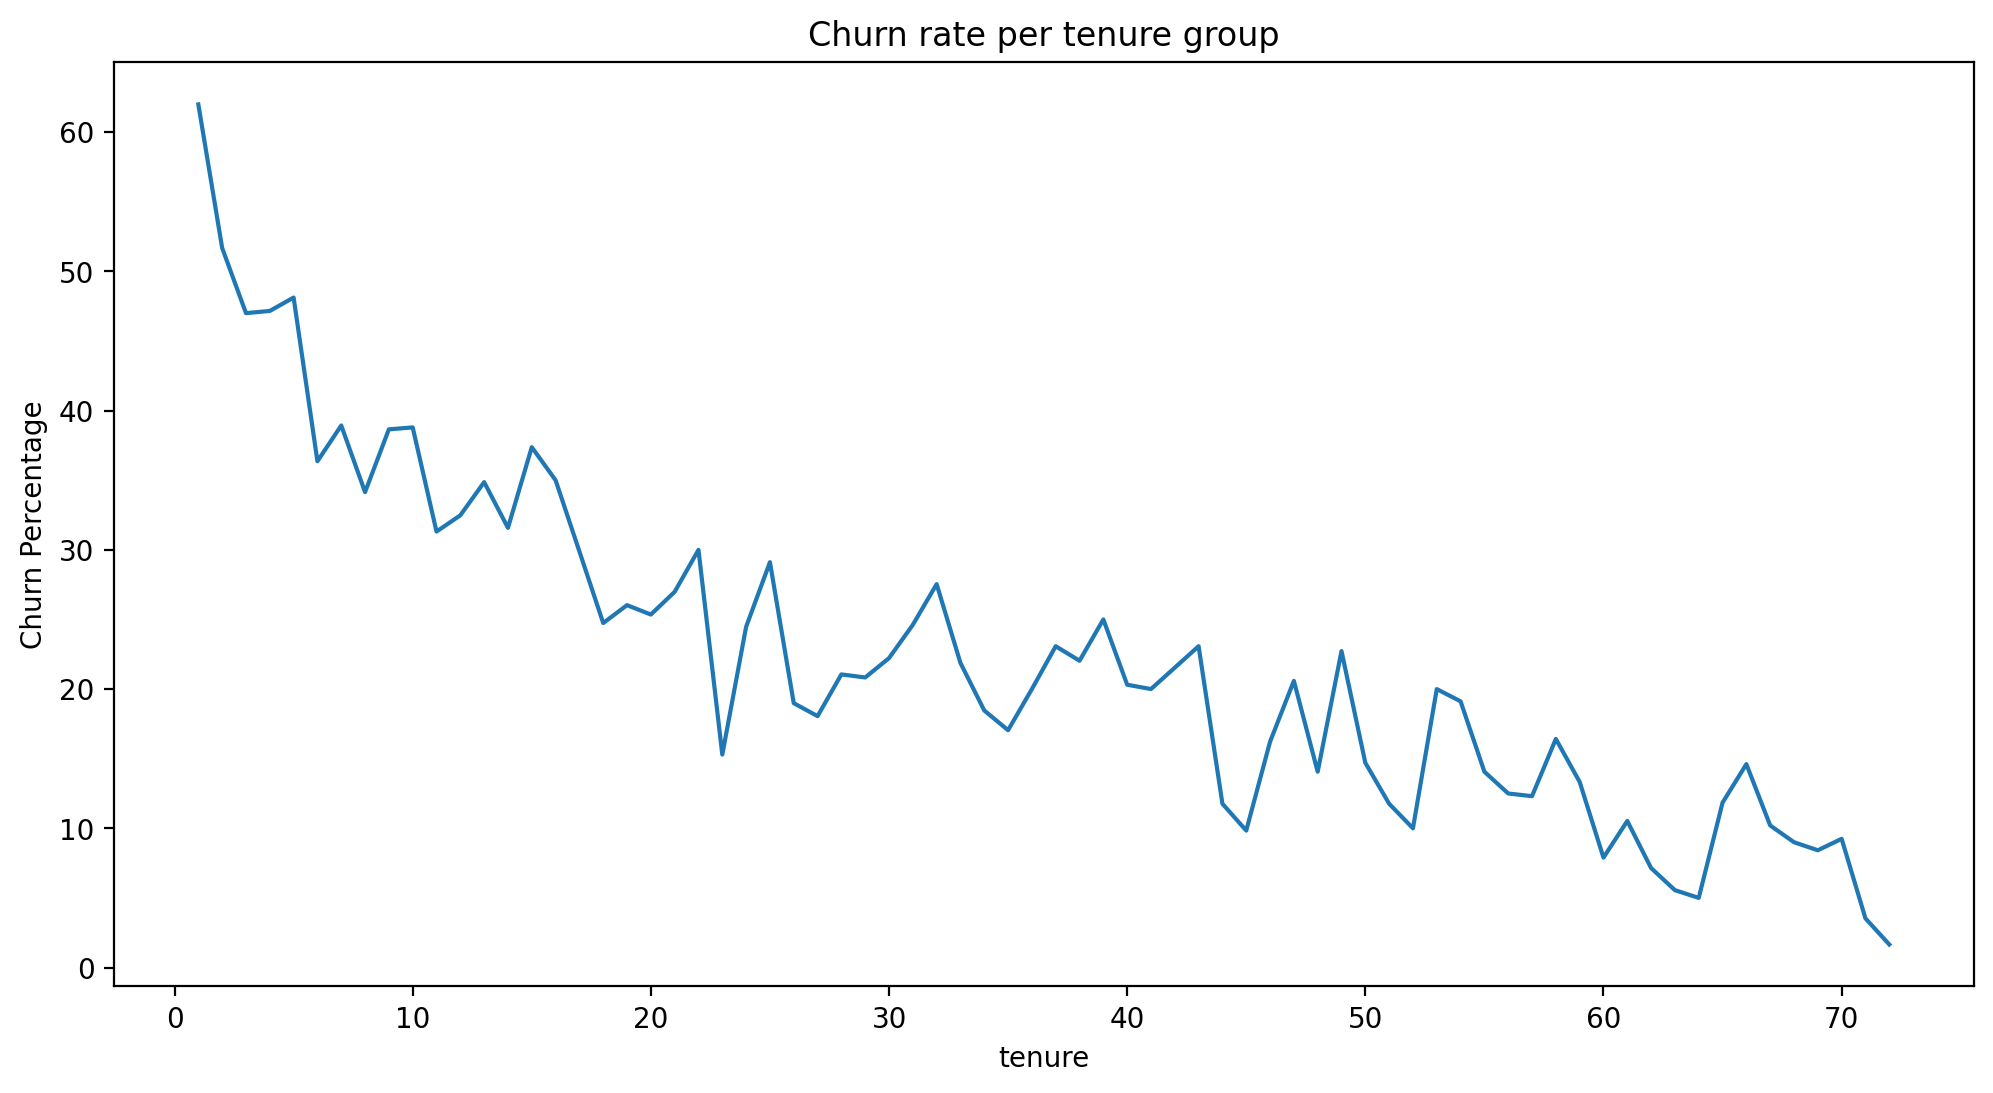

In [147]:
#CODE HERE
plt.figure(figsize=(12, 6), dpi = 200)
sns.lineplot(data = churn_rate, x = "tenure", y = "customerID")
plt.ylabel("Churn Percentage")
plt.title("Churn rate per tenure group")

### Broader Cohort Groups
**TASK: Based on the tenure column values, create a new column called Tenure Cohort that creates 4 separate categories:**
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'    

In [148]:
# CODE HERE
def create_cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return "Over 48 Months"

In [149]:
df['Tenure Cohort'] = df['tenure'].apply(create_cohort)
df.head(10)[['tenure','Tenure Cohort']]

tenure   Tenure Cohort
0       1     0-12 Months
1      34    24-48 Months
2       2     0-12 Months
3      45    24-48 Months
4       2     0-12 Months
5       8     0-12 Months
6      22    12-24 Months
7      10     0-12 Months
8      28    24-48 Months
9      62  Over 48 Months

**TASK: Create a scatterplot of Total Charges versus Monthly Charts,colored by Tenure Cohort defined in the previous task.**

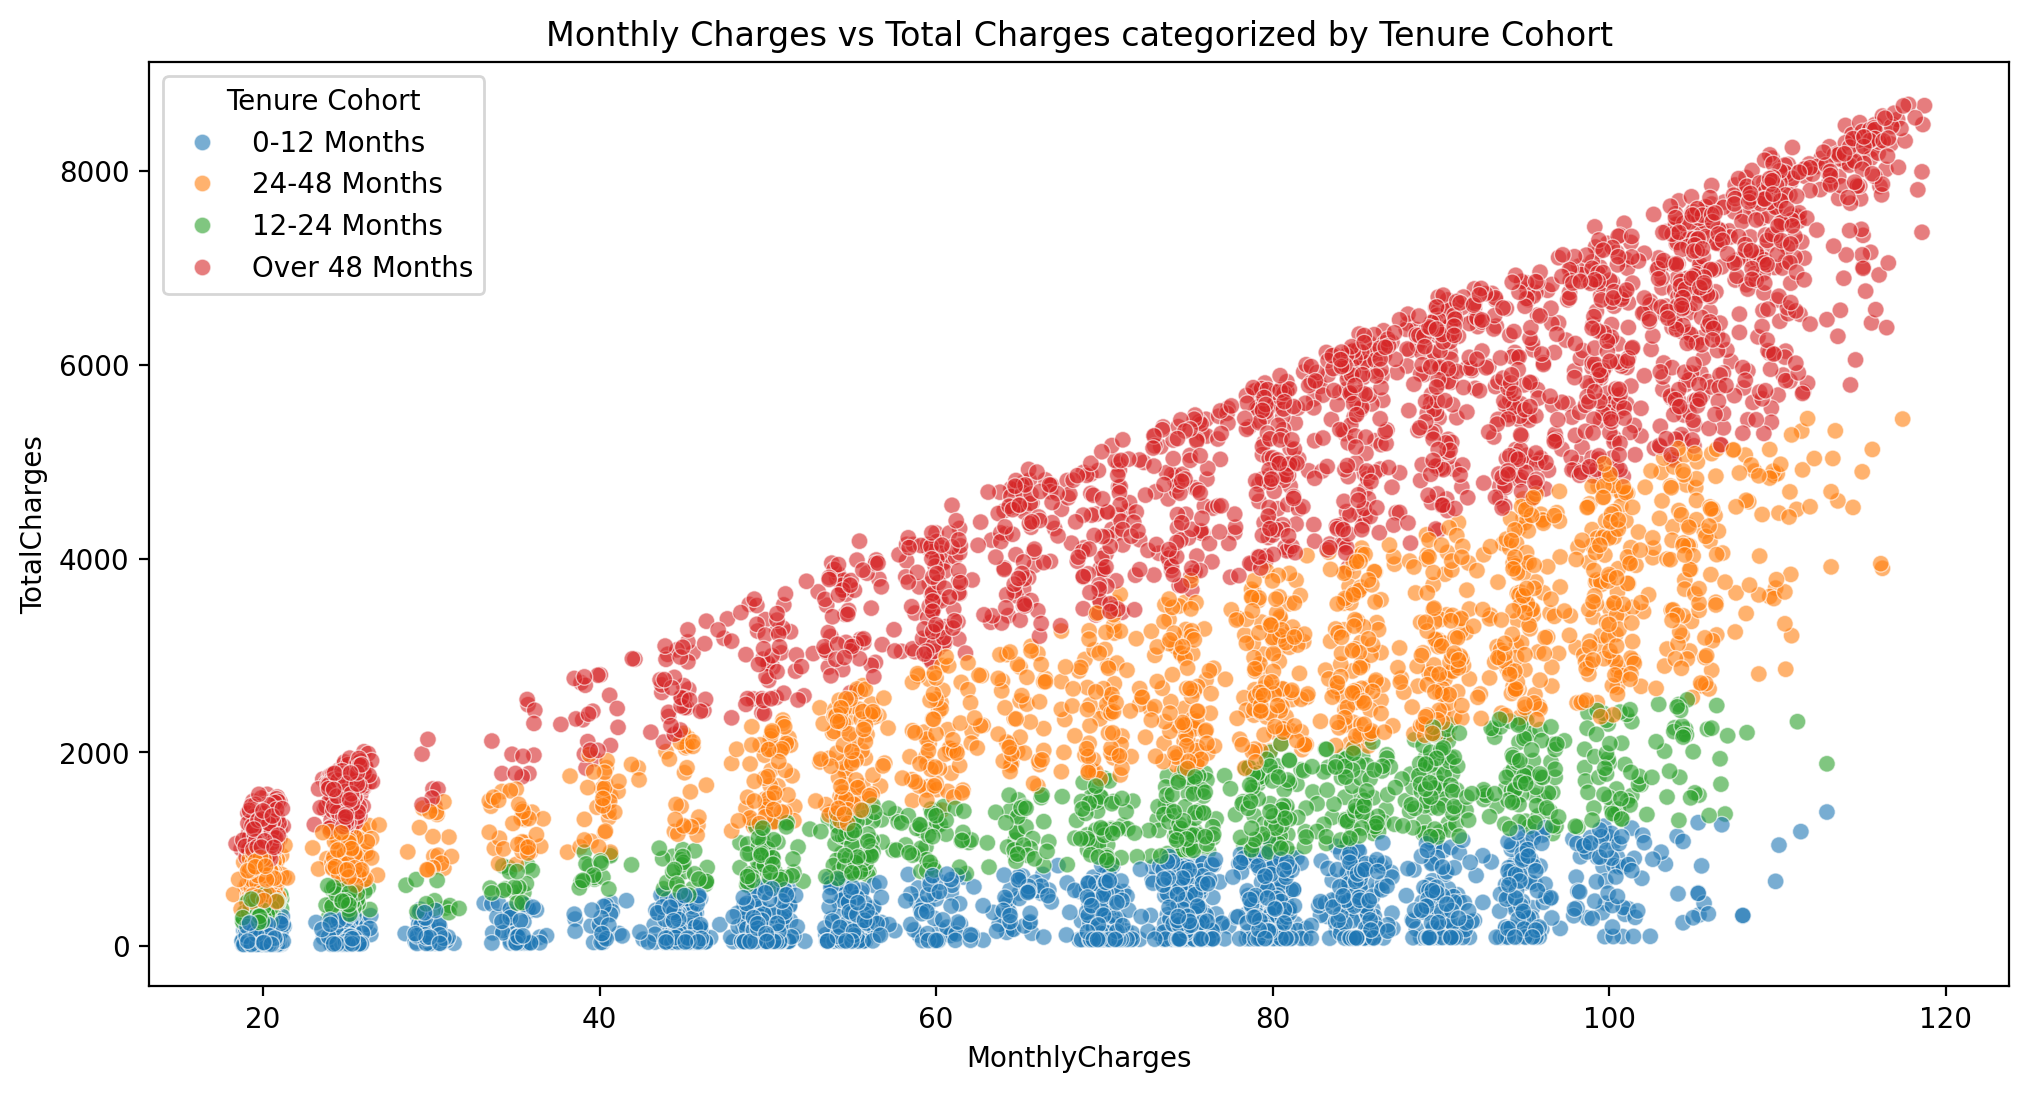

In [150]:
#CODE HERE
plt.figure(figsize=(12, 6), dpi = 200)
sns.scatterplot(data = df, x = 'MonthlyCharges', y = "TotalCharges", hue = "Tenure Cohort", alpha = 0.6)
plt.title('Monthly Charges vs Total Charges categorized by Tenure Cohort')
plt.show()

**TASK: Create a count plot showing the churn count per cohort.**

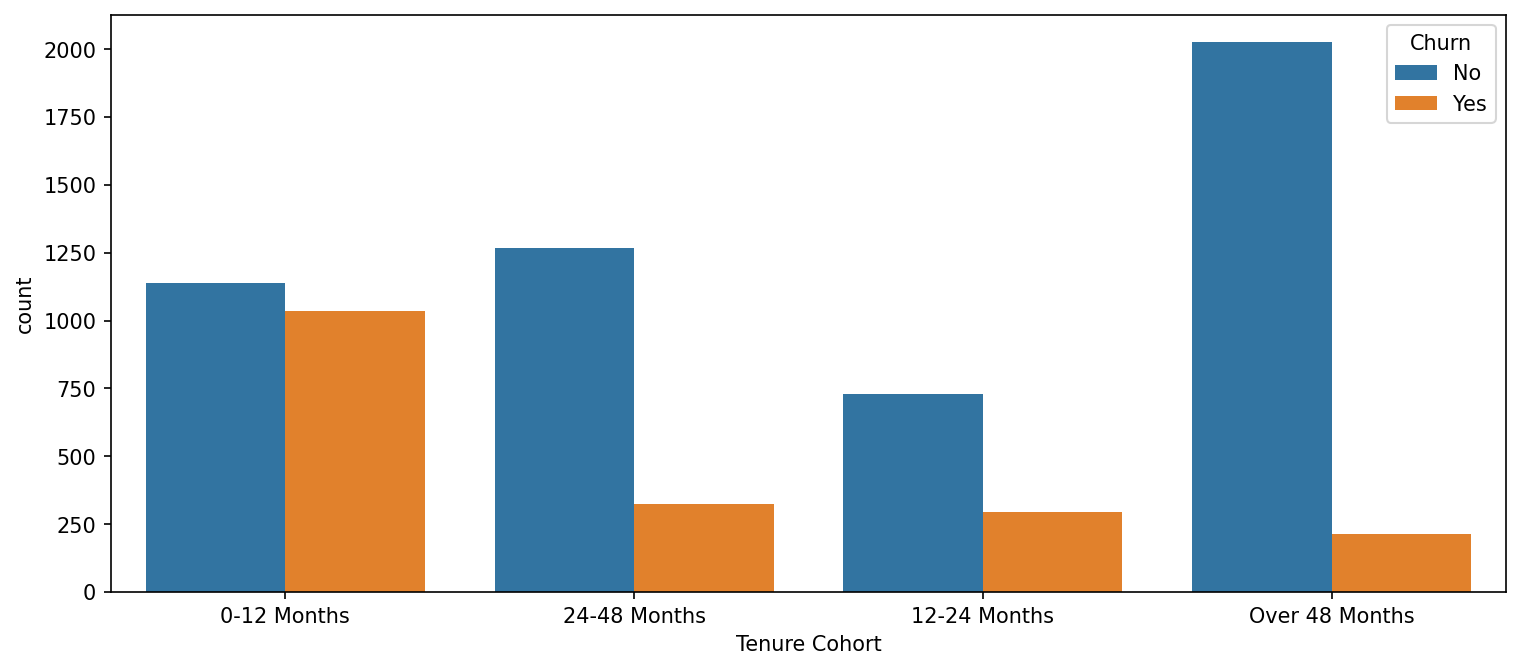

In [151]:
# CODE HERE
plt.figure(figsize=(12, 5), dpi = 150)
sns.countplot(data = df, x = "Tenure Cohort", hue = "Churn")
plt.show()

**TASK: Create a grid of Count Plots showing counts per Tenure Cohort, separated out by contract type and colored by the Churn hue.**

<Figure size 2000x800 with 0 Axes>

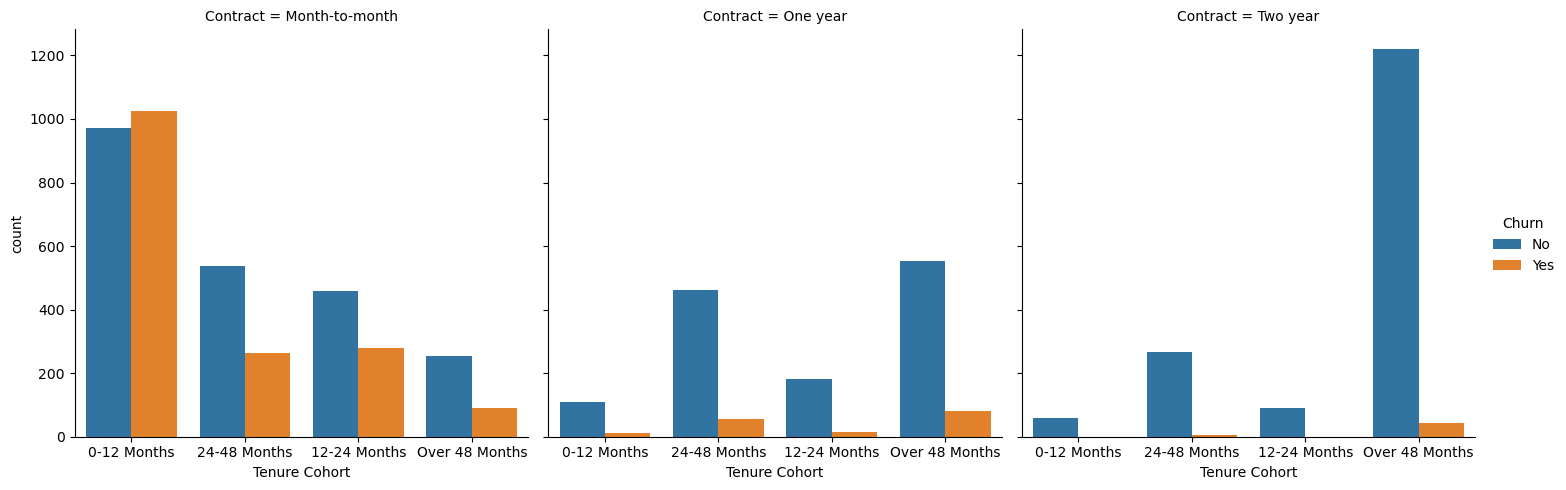

In [152]:
#CODE HERE
plt.figure(figsize=(10,4),dpi=200)
sns.catplot(data=df,x='Tenure Cohort',hue='Churn',col='Contract',kind='count')
plt.show()

-----

# Part 4: Predictive Modeling

**Let's explore 4 different tree based methods: A Single Decision Tree, Random Forest, AdaBoost, Gradient Boosting. Feel free to add any other supervised learning models to your comparisons!**


## Single Decision Tree

**TASK : Separate out the data into X features and Y label. Create dummy variables where necessary and note which features are not useful and should be dropped.**

In [153]:
#CODE HERE
# Creating the X variables
X = df.drop(['Churn','customerID'],axis=1)
X = pd.get_dummies(X,drop_first=True)
X.head()

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_Male  \
0              0       1           29.85         29.85        False   
1              0      34           56.95       1889.50         True   
2              0       2           53.85        108.15         True   
3              0      45           42.30       1840.75         True   
4              0       2           70.70        151.65        False   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0         True           False             False   
1        False           False              True   
2        False           False              True   
3        False           False             False   
4        False           False              True   

   MultipleLines_No phone service  MultipleLines_Yes  ...  \
0                            True              False  ...   
1                           False              False  ...   
2                           False              False  ...   
3                            True              False  ...   
4                           False              False  ...   

   StreamingMovies_Yes  Contract_One year  Contract_Two year  \
0                False              False              False   
1                False               True              False   
2                False              False              False   
3                False               True              False   
4                False              False              False   

   PaperlessBilling_Yes  PaymentMethod_Credit card (automatic)  \
0                  True                                  False   
1                 False                                  False   
2                  True                                  False   
3                 False                                  False   
4                  True                                  False   

   PaymentMethod_Electronic check  PaymentMethod_Mailed check  \
0                            True                       False   
1                           False                        True   
2                           False                        True   
3                           False                       False   
4                            True                       False   

   Tenure Cohort_12-24 Months  Tenure Cohort_24-48 Months  \
0                       False                       False   
1                       False                        True   
2                       False                       False   
3                       False                        True   
4                       False                       False   

   Tenure Cohort_Over 48 Months  
0                         False  
1                         False  
2                         False  
3                         False  
4                         False  

[5 rows x 33 columns]

In [154]:
#Creating the y label
y = df["Churn"]
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7027     No
7028     No
7029     No
7030    Yes
7031     No
Name: Churn, Length: 7032, dtype: object

**TASK: Perform a train test split, holding out 10% of the data for testing. We'll use a random_state of 101 in the solutions notebook/video.**

In [155]:
#CODE HERE
from sklearn.model_selection import train_test_split

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**TASK: Decision Tree Perfomance. Complete the following tasks:**
   1. Train a single decision tree model (feel free to grid search for optimal hyperparameters).
   2. Evaluate performance metrics from decision tree, including classification report and plotting a confusion matrix.
   2. Calculate feature importances from the decision tree.
   4. OPTIONAL: Plot your tree, note, the tree could be huge depending on your pruning, so it may crash your notebook if you display it with plot_tree.

In [157]:
from sklearn.tree import DecisionTreeClassifier

In [158]:
dt = DecisionTreeClassifier(max_depth=6)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [159]:
preds = dt.predict(X_test)
preds

array(['Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No',
       'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No',
       'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'N

In [160]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [161]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.80       704



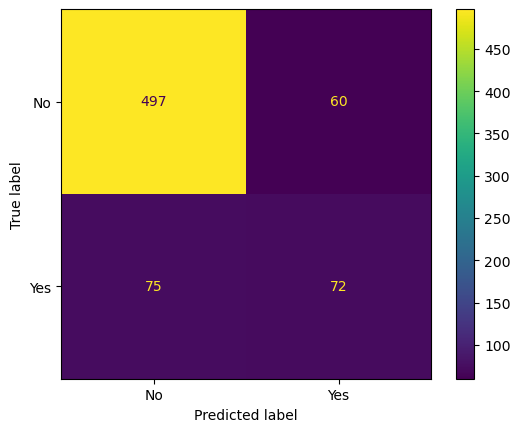

In [162]:
ConfusionMatrixDisplay.from_predictions(y_test, preds)
plt.show()

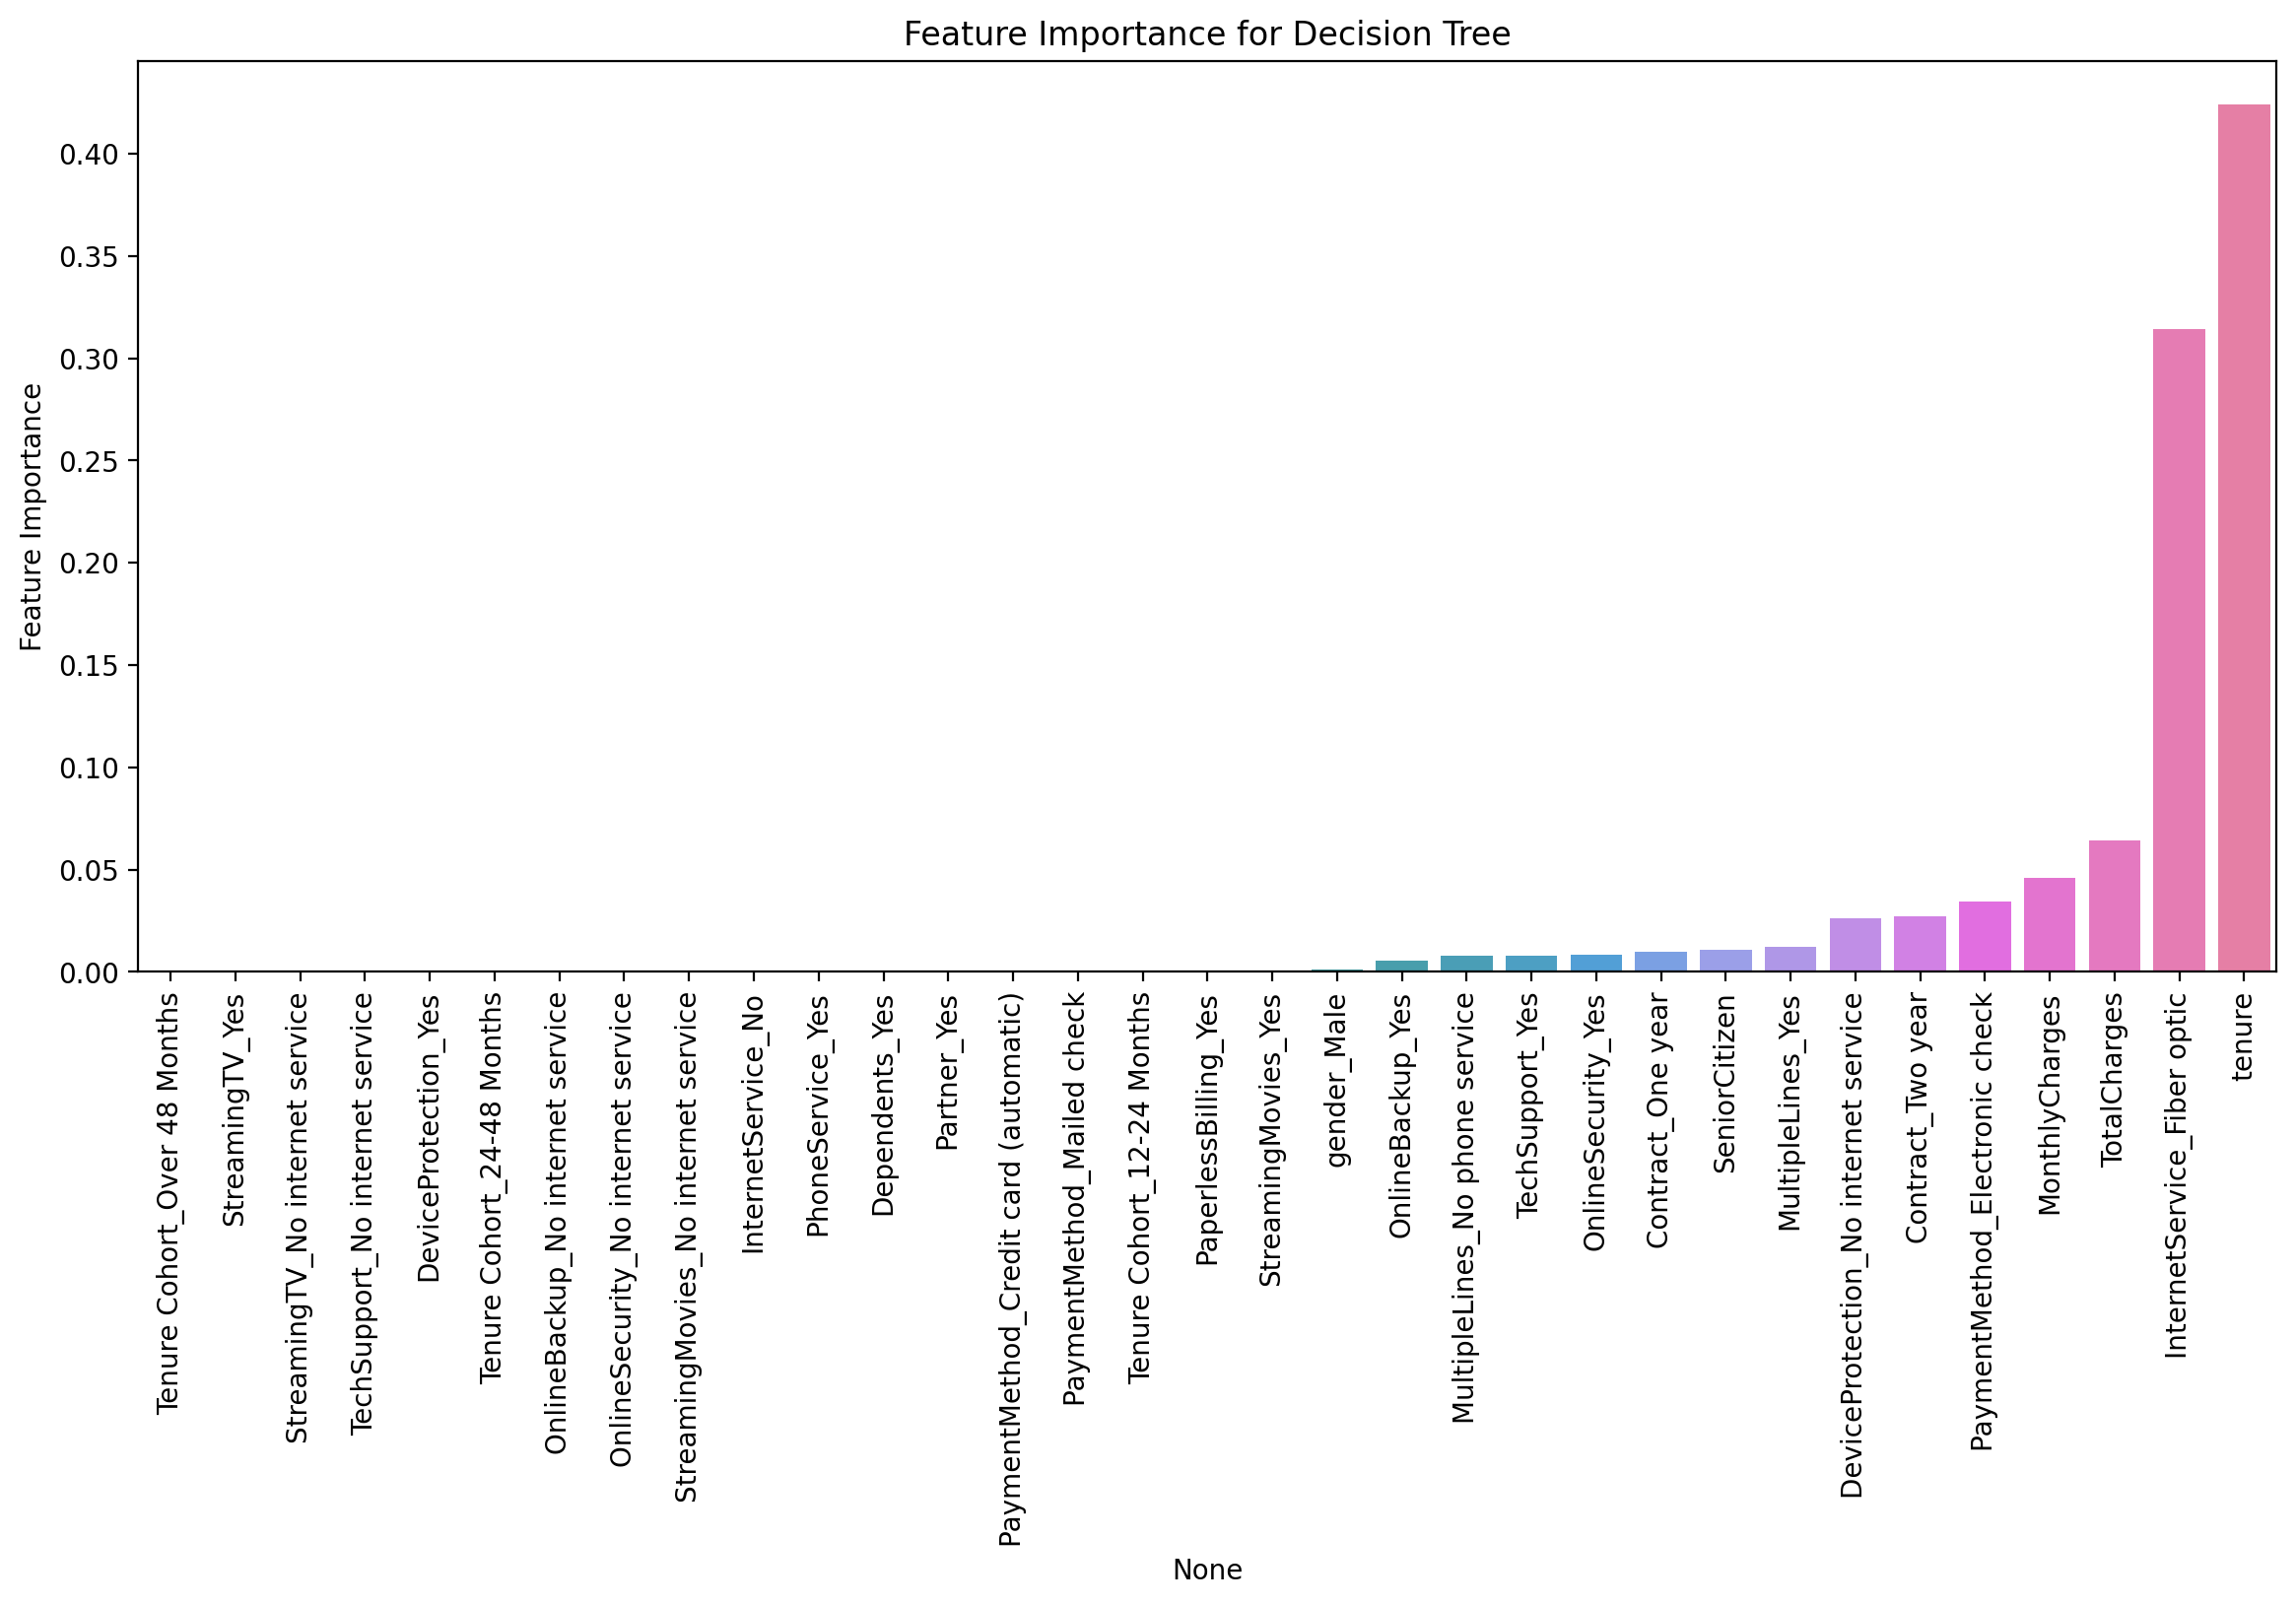

In [163]:
imp_feats = pd.DataFrame(data=dt.feature_importances_,index=X.columns,columns=['Feature Importance']).sort_values("Feature Importance")
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats,x=imp_feats.index,y='Feature Importance', hue = imp_feats.index)
plt.xticks(rotation=90)
plt.title("Feature Importance for Decision Tree");

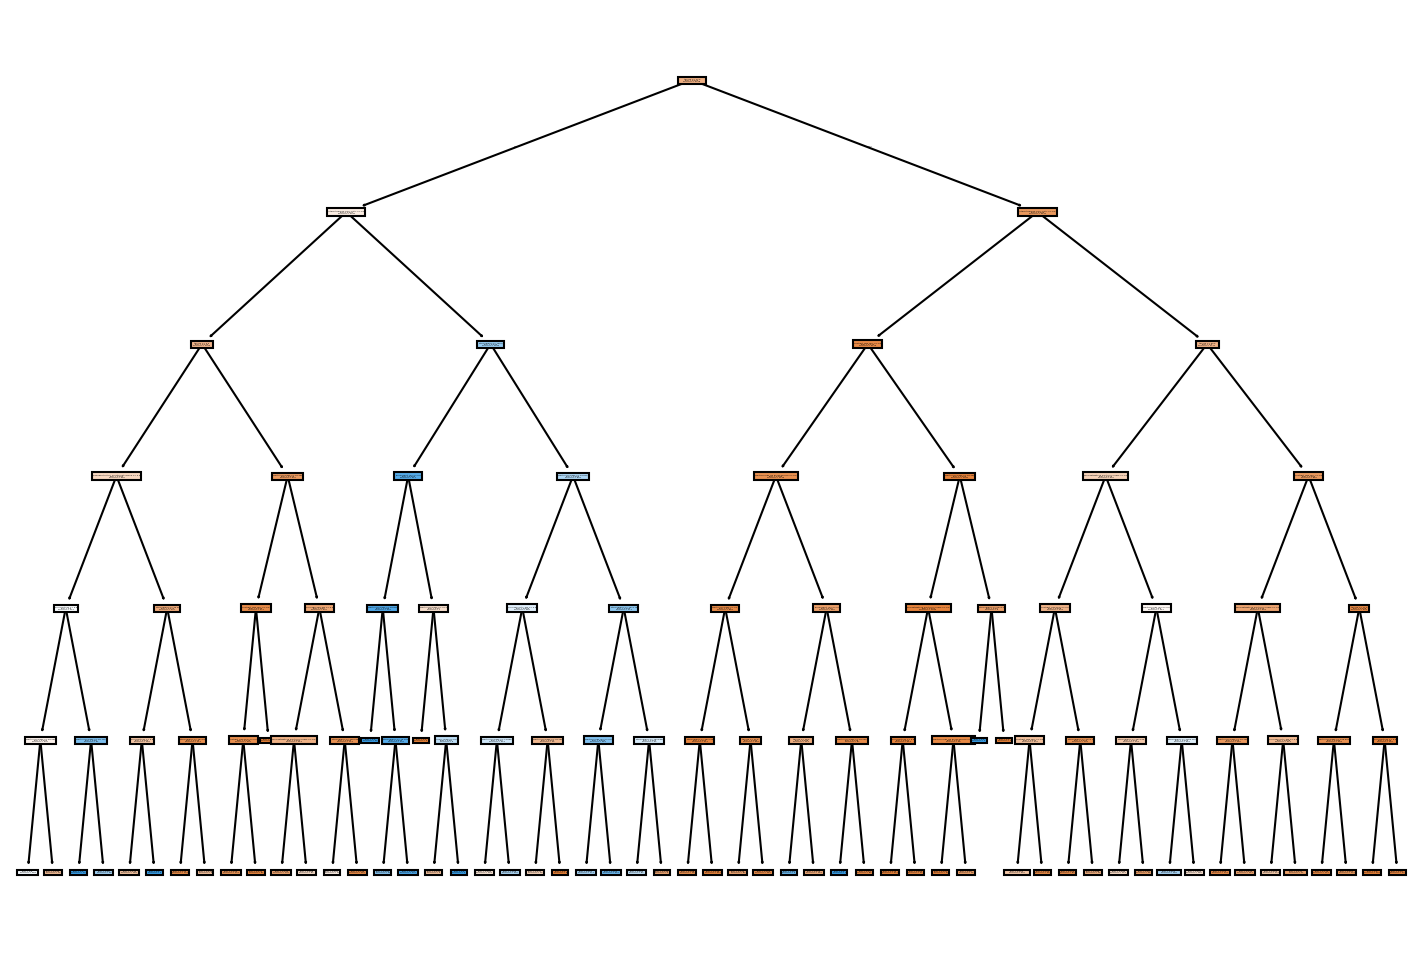

In [164]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8),dpi=150)
plot_tree(dt,filled=True,feature_names=X.columns);

## Random Forest

**TASK: Create a Random Forest model and create a classification report and confusion matrix from its predicted results on the test set.**

In [165]:
#CODE HERE
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)

RandomForestClassifier()

In [166]:
preds = rf.predict(X_test)
preds

array(['Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes',
       'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No',
       'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 

In [167]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.53      0.48      0.51       147

    accuracy                           0.80       704
   macro avg       0.70      0.69      0.69       704
weighted avg       0.80      0.80      0.80       704



In [168]:
ConfusionMatrixDisplay.from_predictions(y_test, preds)
plt.show()

## Boosted Trees

**TASK: Use AdaBoost or Gradient Boosting to create a model and report back the classification report and plot a confusion matrix for its predicted results**

In [169]:
#CODE HERE
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier()
ada_model.fit(X_train,y_train)

/Users/simratkochar/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [170]:
preds = ada_model.predict(X_test)

In [171]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



In [172]:
ConfusionMatrixDisplay.from_predictions(y_test, preds)

**TASK: Analyze your results, which model performed best for you?**

In [173]:
# With base models, we got best performance from an AdaBoostClassifier, but note, we didn't do any gridsearching AND most models performed about the same on the data set.

### Great job!